# Capstone Regression Project
### Scharmaine Chappell

## Business Understanding
My stakeholder, One Call Concepts, Inc. is wanting to prepare for the next busy season. One Call Concepts,known by many different names, including DigSafe, is ran as Washington Utility Notification Center in Washington state. (http://www.callbeforeyoudig.org/washington/faq.asp#q1) They are the middle man when a contractor, or homeowner, or anyone, wants to move dirt around and the locating companies. They maintain databases of underground facilities and use that information to know who to contact using a proprietary software system.

DigSafe would like to be able to predict the final sale prices of properties currently in areas with no view, needing beautification. Working with King County, Washington they have learned that the county is looking to provide incentives to owners of these properties. This predicting model will allow the county to discern what type or amount of incentive to provide the owners. Encouraging economic growth and a more inviting natural habitation throught the county. Which in turn should increase interest in their county from tourists and possible new residents(constituents).

We will begin narrowing the variables by view. We will then remove the price outliers. From the cleaned dataset we will start with the square footage of the lot, total living area and the area above ground.

## Data Understanding
What we'll do is use data gathered on the county from 2021 - 2022 home sales data for King County Washington. https://data.kingcounty.gov/ .



## Data Preparation

### Loading the Data

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style="ticks", palette="rocket")


In [2]:
df = pd.read_csv('data/kc_house_data.csv')

### Data Exploration

In [3]:
#review label, types and for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

In [4]:
#looking for which is carrying the most weight, mean, of the numerical catagories
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,3.015500e+04,3.015500e+04,30155.000000,30155.000000,30155.000000,3.015500e+04,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000
mean,4.538104e+09,1.108536e+06,3.413530,2.334737,2112.424739,1.672360e+04,1.543492,1809.826098,476.039396,330.211142,217.412038,1975.163953,90.922301,47.328076,-121.317397
std,2.882587e+09,8.963857e+05,0.981612,0.889556,974.044318,6.038260e+04,0.567717,878.306131,579.631302,285.770536,245.302792,32.067362,416.473038,1.434005,5.725475
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,2.064175e+09,6.480000e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405320,-122.326045
50%,3.874011e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.480000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551380,-122.225585
75%,7.287100e+09,1.300000e+06,4.000000,3.000000,2619.500000,1.057900e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669913,-122.116205
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


### We see that id is the heaviest, then price, sqft_lot, sqft_living, yr_built, sqft_above. ID is the heaviest, but is not relevant for our problem, so we will drop that column first. Price will be our target. We want to know what percentage of the lot the total living space takes up. And how that takes effects the final price of the property. 

In [5]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
id,1.000000,-0.034184,-0.006306,-0.012094,-0.027932,-0.119101,0.032043,-0.023216,-0.014662,-0.007829,-0.041625,0.023071,-0.029131,-0.000691,0.000479
price,-0.034184,1.000000,0.289204,0.480401,0.608521,0.085730,0.180576,0.538651,0.245058,0.264169,0.313409,0.096013,0.084786,0.063632,-0.022509
bedrooms,-0.006306,0.289204,1.000000,0.589273,0.637874,0.003306,0.147592,0.547164,0.238502,0.319441,0.183439,0.146191,0.014286,0.108758,-0.106689
bathrooms,-0.012094,0.480401,0.589273,1.000000,0.772677,0.035886,0.404412,0.674924,0.260902,0.457022,0.327551,0.443648,0.040631,-0.005225,0.017400
sqft_living,-0.027932,0.608521,0.637874,0.772677,1.000000,0.119563,0.304240,0.883984,0.338460,0.511740,0.396030,0.291694,0.038499,0.102186,-0.087669
sqft_lot,-0.119101,0.085730,0.003306,0.035886,0.119563,1.000000,-0.032097,0.129231,0.004111,0.087169,0.155250,0.001750,0.010049,0.030020,-0.034308
floors,0.032043,0.180576,0.147592,0.404412,0.304240,-0.032097,1.000000,0.448281,-0.248093,0.132656,0.125183,0.544646,-0.025449,-0.218554,0.233781
sqft_above,-0.023216,0.538651,0.547164,0.674924,0.883984,0.129231,0.448281,1.000000,-0.066801,0.560551,0.312117,0.387448,0.010598,0.092258,-0.082744
sqft_basement,-0.014662,0.245058,0.238502,0.260902,0.338460,0.004111,-0.248093,-0.066801,1.000000,0.026361,0.210500,-0.230226,0.053634,0.059788,-0.045208
sqft_garage,-0.007829,0.264169,0.319441,0.457022,0.511740,0.087169,0.132656,0.560551,0.026361,1.000000,0.216354,0.447560,-0.098603,0.092346,-0.096861


<AxesSubplot:>

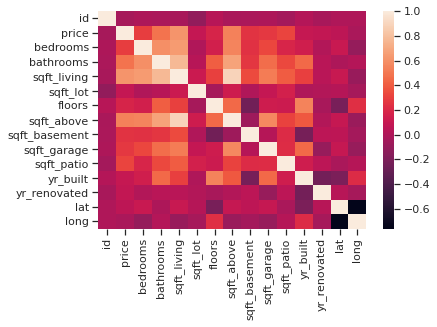

In [6]:
#checking for multicollinearity prior to clean up
sns.heatmap(df.corr())

In [7]:
df.price.corr(df.sqft_lot)

0.0857304213147298

In [8]:
df.price.corr(df.sqft_living)

0.6085212366942929

In [9]:
#sqft_above is the area of the home that is above ground
df.price.corr(df.sqft_above)

0.5386511734301328

### Data Cleaning

In [10]:
#check for null values
df.isnull().sum()

id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
greenbelt         0
nuisance          0
view              0
condition         0
grade             0
heat_source      32
sewer_system     14
sqft_above        0
sqft_basement     0
sqft_garage       0
sqft_patio        0
yr_built          0
yr_renovated      0
address           0
lat               0
long              0
dtype: int64

#### Our heat_source and sewer_system have a negligent amount of null values in respect to the size of the size of the dataset with 32 and 14 out of 30155 entries. Therefore, we will remove these rows from our dataframe

In [11]:
df.dropna(axis = 0, inplace = True)
#confirm null values have been removed
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
greenbelt        0
nuisance         0
view             0
condition        0
grade            0
heat_source      0
sewer_system     0
sqft_above       0
sqft_basement    0
sqft_garage      0
sqft_patio       0
yr_built         0
yr_renovated     0
address          0
lat              0
long             0
dtype: int64

In [12]:
#check the shape of the data verify as well
df.shape

(30111, 25)

In [13]:
#changing the date column label to date sold to clarify what the information is representing
sold = {"date" : "datesold"}
df.rename(columns=sold, inplace=True)
df.columns

Index(['id', 'datesold', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'greenbelt', 'nuisance', 'view',
       'condition', 'grade', 'heat_source', 'sewer_system', 'sqft_above',
       'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built',
       'yr_renovated', 'address', 'lat', 'long'],
      dtype='object')

In [14]:
#changing our datesold column from type object to type datetime 
df.datesold = df.datesold.apply(lambda x: pd.to_datetime(x, yearfirst=True))
df.dtypes

id                        int64
datesold         datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront               object
greenbelt                object
nuisance                 object
view                     object
condition                object
grade                    object
heat_source              object
sewer_system             object
sqft_above                int64
sqft_basement             int64
sqft_garage               int64
sqft_patio                int64
yr_built                  int64
yr_renovated              int64
address                  object
lat                     float64
long                    float64
dtype: object

In [15]:
#creating a new colume, 'age', from the 'yr_renovated' and 'yr_built' columns
df["age"] = np.where(df["yr_renovated"] != 0, df.datesold.apply(lambda x:x.year) - df["yr_renovated"],
df["datesold"].apply(lambda x:x.year) - df["yr_built"])
df.columns

Index(['id', 'datesold', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'greenbelt', 'nuisance', 'view',
       'condition', 'grade', 'heat_source', 'sewer_system', 'sqft_above',
       'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built',
       'yr_renovated', 'address', 'lat', 'long', 'age'],
      dtype='object')

In [16]:
#removing current irrelevant columns
df.drop(axis = 1, labels = {'datesold','id', 'yr_renovated', 'yr_built','lat', 'long'}, inplace = True)
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'greenbelt', 'nuisance', 'view', 'condition', 'grade',
       'heat_source', 'sewer_system', 'sqft_above', 'sqft_basement',
       'sqft_garage', 'sqft_patio', 'address', 'age'],
      dtype='object')

In [17]:
df.dtypes

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront        object
greenbelt         object
nuisance          object
view              object
condition         object
grade             object
heat_source       object
sewer_system      object
sqft_above         int64
sqft_basement      int64
sqft_garage        int64
sqft_patio         int64
address           object
age                int64
dtype: object

In [18]:
#review the address data to determine how to create a new zipcode column
df.address.tail()

30150    4673 Eastern Avenue North, Seattle, Washington...
30151    4131 44th Avenue Southwest, Seattle, Washingto...
30152    910 Martin Luther King Jr Way, Seattle, Washin...
30153    17127 114th Avenue Southeast, Renton, Washingt...
30154    18615 7th Avenue South, Burien, Washington 981...
Name: address, dtype: object

In [19]:
df.address[30111][-20:-15]

'98115'

In [20]:
df.address[30111].split(',')[2][-5:]

'98115'

In [21]:
df["zips"] = df.address.apply(lambda x: x[-20:-15])

In [22]:
#sampling the new 'zips' column to check format
df.zips.sample(5)

23661    98023
21486    98005
20666    98133
11912    98011
21454    98118
Name: zips, dtype: object

In [23]:
df.shape

(30111, 21)

In [24]:
#now that we've separated the zip codes, we can remove the 'address' column
df.drop(axis = 1, labels = 'address', inplace = True)

In [25]:
#verify column removed
df.shape

(30111, 20)

## Modeling

### Baseline Model

In [26]:
#review updated dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30111 entries, 0 to 30154
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          30111 non-null  float64
 1   bedrooms       30111 non-null  int64  
 2   bathrooms      30111 non-null  float64
 3   sqft_living    30111 non-null  int64  
 4   sqft_lot       30111 non-null  int64  
 5   floors         30111 non-null  float64
 6   waterfront     30111 non-null  object 
 7   greenbelt      30111 non-null  object 
 8   nuisance       30111 non-null  object 
 9   view           30111 non-null  object 
 10  condition      30111 non-null  object 
 11  grade          30111 non-null  object 
 12  heat_source    30111 non-null  object 
 13  sewer_system   30111 non-null  object 
 14  sqft_above     30111 non-null  int64  
 15  sqft_basement  30111 non-null  int64  
 16  sqft_garage    30111 non-null  int64  
 17  sqft_patio     30111 non-null  int64  
 18  age   

In [27]:
#Checking our 'view' column we see that 'NONE' is the most frequent response
#at this point we also meet our number of rows, entries, requirements
df.view.describe()

count     30111
unique        5
top        NONE
freq      26555
Name: view, dtype: object

In [28]:
#creating new dataframe with only numerical values
df_num = df[["bedrooms","bathrooms","sqft_living","sqft_lot","floors","sqft_above","sqft_basement","sqft_garage","sqft_patio","age"]]
df_num.dtypes

bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
sqft_above         int64
sqft_basement      int64
sqft_garage        int64
sqft_patio         int64
age                int64
dtype: object

In [29]:
#using just the initial numerical values to create baseline model
pred = df_num
target = df.price

In [30]:
#assigning X and y values
X = pred
y = target

In [31]:
baseline = sm.OLS(y, sm.add_constant(X))
results = baseline.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.409
Method:                 Least Squares   F-statistic:                     2086.
Date:                Mon, 03 Oct 2022   Prob (F-statistic):               0.00
Time:                        01:13:58   Log-Likelihood:            -4.4751e+05
No. Observations:               30111   AIC:                         8.950e+05
Df Residuals:                   30100   BIC:                         8.951e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -4.477e+04   2.44e+04     -1.834

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


### Our R-squared is less 40.9% using just the current numerical values as predictors and 'price' as our target. Our F-statistic and P-values are sbelow .5 as well.

### We will create some dummy variables for our catagorical columns

<AxesSubplot:>

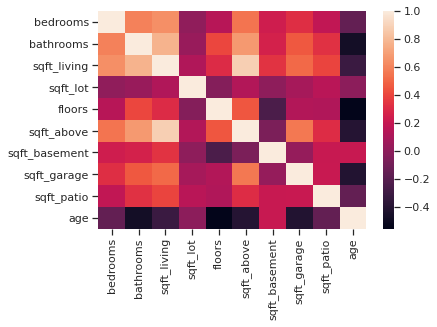

In [32]:
#checking for multicollinearity
sns.heatmap(X.corr())

### We see that 'sqft_living' and 'sqft_above' (how many square feet of living space is above ground) are most correlated

In [33]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,age
price,1.000000,0.288954,0.480337,0.608616,0.086550,0.180589,0.538631,0.245005,0.263674,0.313789,-0.126909
bedrooms,0.288954,1.000000,0.588035,0.637048,0.006215,0.146871,0.546221,0.237957,0.318110,0.183660,-0.156650
bathrooms,0.480337,0.588035,1.000000,0.772226,0.038028,0.404291,0.674239,0.260684,0.456264,0.327982,-0.471854
sqft_living,0.608616,0.637048,0.772226,1.000000,0.122271,0.303911,0.883733,0.338387,0.510967,0.396530,-0.312269
sqft_lot,0.086550,0.006215,0.038028,0.122271,1.000000,-0.031555,0.131756,0.004457,0.089318,0.154575,-0.003427
floors,0.180589,0.146871,0.404291,0.303911,-0.031555,1.000000,0.448245,-0.248466,0.132363,0.125016,-0.552862
sqft_above,0.538631,0.546221,0.674239,0.883733,0.131756,0.448245,1.000000,-0.067306,0.559972,0.312593,-0.397502
sqft_basement,0.245005,0.237957,0.260684,0.338387,0.004457,-0.248466,-0.067306,1.000000,0.025766,0.210305,0.211054
sqft_garage,0.263674,0.318110,0.456264,0.510967,0.089318,0.132363,0.559972,0.025766,1.000000,0.216512,-0.409075
sqft_patio,0.313789,0.183660,0.327982,0.396530,0.154575,0.125016,0.312593,0.210305,0.216512,1.000000,-0.157426


In [34]:
df.sqft_above.corr(df.sqft_living)

0.8837330776377422

### Model Iteration

In [35]:
#reviewing data for catagorical columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30111 entries, 0 to 30154
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          30111 non-null  float64
 1   bedrooms       30111 non-null  int64  
 2   bathrooms      30111 non-null  float64
 3   sqft_living    30111 non-null  int64  
 4   sqft_lot       30111 non-null  int64  
 5   floors         30111 non-null  float64
 6   waterfront     30111 non-null  object 
 7   greenbelt      30111 non-null  object 
 8   nuisance       30111 non-null  object 
 9   view           30111 non-null  object 
 10  condition      30111 non-null  object 
 11  grade          30111 non-null  object 
 12  heat_source    30111 non-null  object 
 13  sewer_system   30111 non-null  object 
 14  sqft_above     30111 non-null  int64  
 15  sqft_basement  30111 non-null  int64  
 16  sqft_garage    30111 non-null  int64  
 17  sqft_patio     30111 non-null  int64  
 18  age   

In [36]:
#reviewing a sample of the types of values in the catagorical values
df[["waterfront", "greenbelt", "nuisance", "view", "condition", "grade", "heat_source", "sewer_system", "zips"]].value_counts()

waterfront  greenbelt  nuisance  view     condition  grade          heat_source  sewer_system  zips 
NO          NO         NO        NONE     Average    8 Good         Gas          PUBLIC        98042    204
                                                                                               98038    184
                                                                                               98010    163
                                                                                               98058    139
                                                     7 Average      Gas          PUBLIC        98038    135
                                                                                                       ... 
                                          Fair       6 Low Average  Oil          PUBLIC        98118      1
                                                                                               98117      1
                                   

In [37]:
#creating a dataframe catagorical dummy values, excluding zipcodes as we do not need them at this time 
#and they will highly skew our results
cats= ["waterfront", "greenbelt", "nuisance", "view", "condition", "grade", "heat_source", "sewer_system"]
df_dummy= pd.get_dummies(data = df, columns = cats, drop_first=True)
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30111 entries, 0 to 30154
Data columns (total 43 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   price                            30111 non-null  float64
 1   bedrooms                         30111 non-null  int64  
 2   bathrooms                        30111 non-null  float64
 3   sqft_living                      30111 non-null  int64  
 4   sqft_lot                         30111 non-null  int64  
 5   floors                           30111 non-null  float64
 6   sqft_above                       30111 non-null  int64  
 7   sqft_basement                    30111 non-null  int64  
 8   sqft_garage                      30111 non-null  int64  
 9   sqft_patio                       30111 non-null  int64  
 10  age                              30111 non-null  int64  
 11  zips                             30111 non-null  object 
 12  waterfront_YES    

In [38]:
#removing spaces from column names and replacing with '_'
df_dummy.columns = df_dummy.columns.str.replace(' ', '_')
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30111 entries, 0 to 30154
Data columns (total 43 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   price                            30111 non-null  float64
 1   bedrooms                         30111 non-null  int64  
 2   bathrooms                        30111 non-null  float64
 3   sqft_living                      30111 non-null  int64  
 4   sqft_lot                         30111 non-null  int64  
 5   floors                           30111 non-null  float64
 6   sqft_above                       30111 non-null  int64  
 7   sqft_basement                    30111 non-null  int64  
 8   sqft_garage                      30111 non-null  int64  
 9   sqft_patio                       30111 non-null  int64  
 10  age                              30111 non-null  int64  
 11  zips                             30111 non-null  object 
 12  waterfront_YES    

In [39]:
#creating dataframe with only rows where 'view_NONE' is True
nview_df = df_dummy[df_dummy.view_NONE == 1]
nview_df.view_NONE.value_counts()

1    26555
Name: view_NONE, dtype: int64

In [40]:
#confirming it's the entire df
nview_df.shape

(26555, 43)

In [41]:
#remove currently irrelevant 'view' dummy values that are NaN

nview_df.drop(axis = 1, labels = {'view_EXCELLENT','view_FAIR', 'view_GOOD', 'view_NONE'}, inplace = True)
#verify columns removed
nview_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26555 entries, 0 to 30154
Data columns (total 39 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   price                            26555 non-null  float64
 1   bedrooms                         26555 non-null  int64  
 2   bathrooms                        26555 non-null  float64
 3   sqft_living                      26555 non-null  int64  
 4   sqft_lot                         26555 non-null  int64  
 5   floors                           26555 non-null  float64
 6   sqft_above                       26555 non-null  int64  
 7   sqft_basement                    26555 non-null  int64  
 8   sqft_garage                      26555 non-null  int64  
 9   sqft_patio                       26555 non-null  int64  
 10  age                              26555 non-null  int64  
 11  zips                             26555 non-null  object 
 12  waterfront_YES    

/opt/conda/lib/python3.9/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [42]:
#checking size of new dataframe
nview_df.shape

(26555, 39)

In [43]:
#determining upper and lower price of these no view property
nview_df.price.describe()

count    2.655500e+04
mean     1.018818e+06
std      6.757027e+05
min      2.736000e+04
25%      6.299500e+05
50%      8.299500e+05
75%      1.212968e+06
max      1.574000e+07
Name: price, dtype: float64

<AxesSubplot:xlabel='price'>

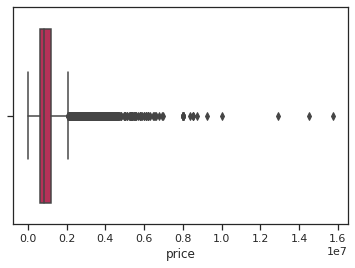

In [44]:
#plotting 'price' values of range_df
sns.boxplot(data = nview_df, x= 'price', color = "blue", palette = "rocket")

In [45]:
#removing unwanted outliers
min_reach, max_reach = nview_df.price.quantile([0.05, 0.95])
min_reach, max_reach

(420000.0, 2220000.0)

In [46]:
nview_df[nview_df.price > max_reach]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,...,grade_9_Better,heat_source_Electricity/Solar,heat_source_Gas,heat_source_Gas/Solar,heat_source_Oil,heat_source_Oil/Solar,heat_source_Other,sewer_system_PRIVATE_RESTRICTED,sewer_system_PUBLIC,sewer_system_PUBLIC_RESTRICTED
27,4500000.0,4,3.0,2760,13150,1.5,2760,0,0,160,...,1,0,0,0,1,0,0,0,1,0
36,2450000.0,4,3.5,2300,8370,2.0,2300,0,560,110,...,1,0,1,0,0,0,0,0,1,0
43,3850000.0,5,3.5,4180,209959,1.0,4180,0,0,0,...,0,0,1,0,0,0,0,0,0,0
84,2500000.0,4,3.5,3120,3801,2.0,2540,1170,590,380,...,0,0,0,0,0,0,0,0,1,0
118,3000000.0,3,1.5,2040,14284,1.0,2040,0,400,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30100,2588000.0,5,4.5,3580,5719,2.0,3580,0,460,220,...,1,0,1,0,0,0,0,0,1,0
30106,2875000.0,3,2.0,1900,8800,1.0,1600,1100,200,80,...,0,0,0,0,1,0,0,0,1,0
30126,3754500.0,4,5.5,5200,10790,2.0,5200,0,730,400,...,0,0,1,0,0,0,0,0,1,0
30130,2435000.0,5,3.0,3920,8414,1.0,2210,2210,500,350,...,1,0,1,0,0,0,0,0,1,0


In [47]:
nview_df[nview_df.price < min_reach]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,...,grade_9_Better,heat_source_Electricity/Solar,heat_source_Gas,heat_source_Gas/Solar,heat_source_Oil,heat_source_Oil/Solar,heat_source_Other,sewer_system_PRIVATE_RESTRICTED,sewer_system_PUBLIC,sewer_system_PUBLIC_RESTRICTED
45,315000.0,3,1.0,1150,6477,1.0,1150,0,0,80,...,0,0,1,0,0,0,0,0,1,0
52,235000.0,2,1.0,700,14750,1.5,700,0,0,0,...,0,0,0,0,0,0,0,0,0,0
56,37440.0,4,2.5,1670,13703,1.0,1140,1100,530,240,...,0,0,1,0,0,0,0,0,1,0
67,275000.0,4,1.0,1700,7692,1.0,1200,1150,450,120,...,0,0,1,0,0,0,0,0,1,0
81,370000.0,3,1.5,1040,8550,1.0,1040,0,420,70,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30040,315500.0,3,1.0,1290,7500,1.5,1290,0,0,110,...,0,0,1,0,0,0,0,0,1,0
30071,400000.0,1,1.0,760,148975,2.0,760,0,0,200,...,0,0,0,0,0,0,0,0,0,0
30092,345629.0,3,3.5,1430,1078,2.0,1100,330,0,230,...,0,0,0,0,0,0,0,0,1,0
30125,337500.0,3,1.0,1350,6628,1.0,1350,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [48]:
#creating new dataframe to represent view_NONE values only within our new price range
range_df = nview_df[(nview_df.price < max_reach) & (nview_df.price > min_reach)]
range_df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,...,grade_9_Better,heat_source_Electricity/Solar,heat_source_Gas,heat_source_Gas/Solar,heat_source_Oil,heat_source_Oil/Solar,heat_source_Other,sewer_system_PRIVATE_RESTRICTED,sewer_system_PUBLIC,sewer_system_PUBLIC_RESTRICTED
0,675000.0,4,1.0,1180,7140,1.0,1180,0,0,40,...,0,0,1,0,0,0,0,0,1,0
4,592500.0,2,2.0,1120,758,2.0,1120,550,550,30,...,0,0,0,0,0,0,0,0,1,0
5,625000.0,2,1.0,1190,5688,1.0,1190,0,300,0,...,0,0,0,0,0,0,0,0,1,0
7,820000.0,3,2.5,2214,3506,2.0,2214,0,440,206,...,0,0,1,0,0,0,0,0,1,0
8,780000.0,4,2.5,2340,8125,2.0,2340,0,440,70,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30149,719000.0,3,2.5,1270,1141,2.0,1050,420,200,60,...,0,0,1,0,0,0,0,0,1,0
30150,1555000.0,5,2.0,1910,4000,1.5,1600,1130,0,210,...,0,0,0,0,1,0,0,0,1,0
30152,800000.0,3,2.0,1620,3600,1.0,940,920,240,110,...,0,0,1,0,0,0,0,0,1,0
30153,775000.0,3,2.5,2570,2889,2.0,1830,740,480,100,...,0,0,1,0,0,0,0,0,1,0


In [49]:
range_df.shape

(23879, 39)

<AxesSubplot:xlabel='price'>

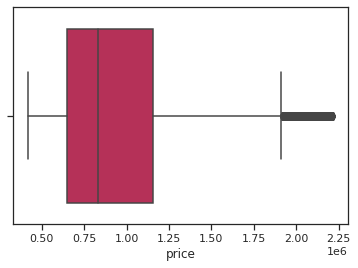

In [50]:
#plotting 'price' values of range_df update
sns.boxplot(data = range_df, x= 'price', color = "blue", palette = "rocket")

In [51]:
#reviewing for values of 0, removing these values and zips at this time
range_df.sum()

price                                                                  22533040432.0
bedrooms                                                                       80524
bathrooms                                                                    53920.0
sqft_living                                                                 47050176
sqft_lot                                                                   331211730
floors                                                                       36903.0
sqft_above                                                                  40897434
sqft_basement                                                               10000265
sqft_garage                                                                  7673447
sqft_patio                                                                   4601616
age                                                                          1024226
zips                               980559802798133980309802398144

In [52]:
#create new df removing currently irrelevant dummy, 'zips' columns
clean_df = range_df.drop(axis = 1, labels = {'zips','grade_12_Luxury', 'grade_13_Mansion', 'grade_2_Substandard'})
#verify columns removed
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23879 entries, 0 to 30154
Data columns (total 35 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   price                            23879 non-null  float64
 1   bedrooms                         23879 non-null  int64  
 2   bathrooms                        23879 non-null  float64
 3   sqft_living                      23879 non-null  int64  
 4   sqft_lot                         23879 non-null  int64  
 5   floors                           23879 non-null  float64
 6   sqft_above                       23879 non-null  int64  
 7   sqft_basement                    23879 non-null  int64  
 8   sqft_garage                      23879 non-null  int64  
 9   sqft_patio                       23879 non-null  int64  
 10  age                              23879 non-null  int64  
 11  waterfront_YES                   23879 non-null  uint8  
 12  greenbelt_YES     

In [53]:
preds_2 = clean_df.drop(labels = ['price'], axis = 1)
target_2 = clean_df.price

In [54]:
X_2 = preds_2
y_2 = target_2

In [55]:
model_2 = sm.OLS(y_2, sm.add_constant(X_2))
results_2 = model_2.fit()
print(results_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.428
Method:                 Least Squares   F-statistic:                     526.6
Date:                Mon, 03 Oct 2022   Prob (F-statistic):               0.00
Time:                        01:14:00   Log-Likelihood:            -3.3501e+05
No. Observations:               23879   AIC:                         6.701e+05
Df Residuals:                   23844   BIC:                         6.704e+05
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


### Our R-squared using is now 42.9%, F-statistic is below 0. We have mostly P-statistics above .5, but some are above this max. Looking at our values for 'sqft_lot', 'sqft_living' and 'sqft_above',  their P-statistics are below 0. So, we can move forward using those as our predictor values.

In [56]:
# Check our current data's correlations with price
clean_df.price.corr(df.sqft_lot)

0.0897269272686582

In [57]:
clean_df.price.corr(df.sqft_living)

0.5559064554200225

In [58]:
clean_df.price.corr(df.sqft_above)

0.4862121999941026

<AxesSubplot:>

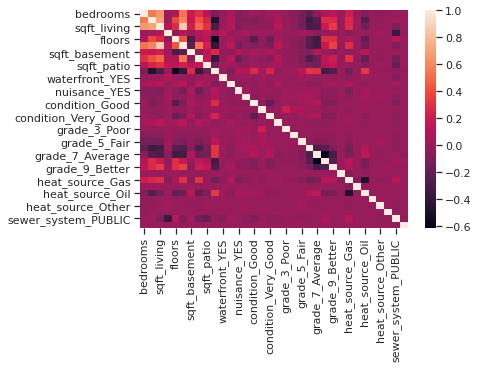

In [59]:
sns.heatmap(X_2.corr())

### Final Model

## Regression Results

## The model represented is:
### Price = 812,600 + 0.3841(sqft_lot) + 96.8246(sqft_above) + 94.7702(sqft_living)

### Keeping in mind we are reviewing data only pertaining to original entries listed as view_NONE between the 95th and 5th percentiles of price:

#### Overall, this model is statistically significant with a t-statistic p-value and overall F_p-value still below 5%. 

##### This shows our sqft_lot, sqft_above and sqft_living parameters each significantly impact price
##### For each sf of increase in sqft_Lot we only gain .38 units in Price, even though it's p-value is still below 5%.
##### This shows us that sqft_lot is not a good fit for this linear regression model

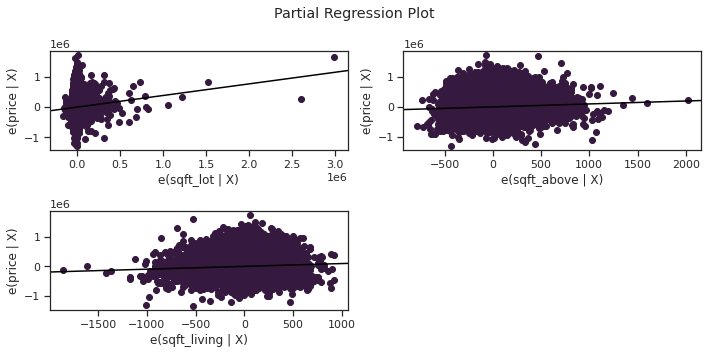

In [60]:
# This will model our chosen predictors alone without the effects of the other two
fig = plt.figure(figsize=(10,5))
sm.graphics.plot_partregress_grid(results_2, exog_idx=["sqft_lot", "sqft_above", "sqft_living"], fig=fig)
plt.tight_layout()
plt.show()

## Conclusion

### In conclusion, we can see that our initially chosen parameters sqft_lot, sqft_above, and sqft_living have some significance in determining final home selling price. With that said sqft_lot for this particular set of data, does not seem to add much to the price. However, their may be other factors that we may want to consider. We need to discern if the view values of 'NONE' are accurate, really NaN values, or are misleading in some other fashion. Other considerations may be the factors of condition and grade as they have p-values below 5% as well, we also see a larger stastistically significant impact on sales price of these homes. 

### Thank you,
### Scharmaine Chappell